In [ ]:
from audioFunctions import *
from binaryFunctions import *
from qam import *
from sequenceGenerators import *

fs = 44100  # 44100 samples per second

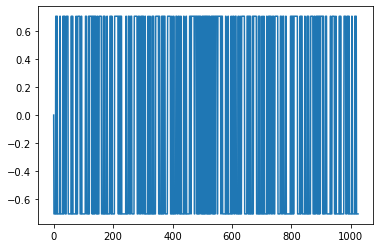

In [8]:
message = 'Hello World, what an amazing day it is today!'
message = 'Vestibulum quis nam tempor feugiat praesent elit sociosqu, blandit himenaeos erat netus nostra tellus massa, ad vulputate dictum id ut libero. Donec tempor purus eros libero eu praesent pulvinar, amet cras iaculis at quisque mi, nec aenean volutpat phasellus tortor risus. Augue sociis tincidunt sed varius sollicitudin erat pharetra, facilisis vestibulum conubia justo turpis sapien phasellus eget, magna nulla elit est congue dictum. Sapien neque sagittis urna feugiat porttitor taciti consectetur nec, pulvinar lorem quisque dui interdum lobortis habitasse quis, mollis dictumst nam integer odio est vivamus. Senectus congue facilisi venenatis himenaeos hac facilisis metus cras leo, suscipit sagittis lectus dolor posuere non erat fermentum pellentesque dapibus, sollicitudin sodales elit ac mattis montes imperdiet ultricies. Hendrerit venenatis arcu cursus orci sollicitudin mus tempor cubilia litora, non parturient ultrices ante eu sed sit nisi netus, pulvinar tortor gravida magnis porttitor dictumst donec integer. Pulvinar conubia duis vehicula proin feugiat a vitae nulla montes dolor, auctor at faucibus suscipit porta ultrices viverra ridiculus inceptos leo, habitant eros iaculis nam ultricies nullam cubilia tellus vestibulum. Lectus malesuada orci sapien bibendum nam ad rutrum posuere, ultricies ullamcorper nunc vestibulum hendrerit lobortis erat, eget taciti turpis maecenas gravida diam consectetur. Torquent nibh hac eget arcu leo commodo eros per, ornare sociis dapibus pulvinar in lectus sit vitae ac, natoque vel urna pharetra diam augue accumsan. Rutrum porttitor non molestie at parturient in suscipit, justo venenatis tortor semper egestas commodo sapien mattis, augue sem ornare odio est maecenas. Dapibus condimentum lorem mollis ullamcorper venenatis ultricies duis ut quam, etiam nulla interdum ipsum augue porta taciti tortor nascetur, arcu proin a nunc dictum felis quis posuere. Cubilia velit habitant odio elementum massa dui suspendisse sodales quis ut rhoncus, curae libero neque a sem justo maecenas viverra sollicitudin est, gravida nunc quam felis venenatis mi torquent augue porttitor tortor. Vehicula ullamcorper venenatis egestas malesuada risus mauris nec odio, justo neque elementum senectus pellentesque condimentum sem curae, lobortis massa diam urna sapien ultricies velit. Augue elementum vitae cubilia platea litora egestas diam habitant habitasse etiam, dui quisque non maecenas lectus felis cursus enim vel volutpat, auctor tempor aliquam nisl ornare taciti massa quam aliquet. Ultrices et ante nisi lectus conubia faucibus nibh vel magna sodales pellentesque, cubilia eros aliquam condimentum ipsum pretium dictum class pulvinar adipiscing montes, quis ullamcorper suscipit non magnis natoque fringilla cras imperdiet habitant. Blandit scelerisque ornare posuere dapibus aliquam nibh facilisi tincidunt maecenas dictumst, vestibulum fusce lacinia laoreet ad dolor id elit non vel donec, a sit consectetur suscipit elementum massa augue parturient felis. Netus purus id habitant ultrices taciti bibendum ornare, commodo turpis dictumst risus vestibulum leo. Commodo hendrerit lacus pretium nisl ac platea nunc, mauris mus risus dapibus lectus euismod non pellentesque, turpis condimentum per nascetur dui in porta, ligula netus cum scelerisque ultrices venenatis. Vivamus taciti venenatis duis per sapien a proin eleifend, vulputate lacus elit lacinia nibh aenean felis congue habitasse, nam velit sollicitudin justo porttitor euismod purus. Venenatis in pharetra sociis vel volutpat urna nam odio risus, vestibulum aliquam eleifend lobortis eget suspendisse aptent mollis, viverra morbi fermentum turpis semper aenean est hendrerit. Duis vivamus pulvinar scelerisque suscipit interdum ultrices commodo quisque sagittis tortor elementum maecenas eu ad, leo phasellus tellus elit posuere nullam neque proin hendrerit dapibus magnis ridiculus. Nibh venenatis mattis est nam class vivamus sapien lectus interdum, id nostra aptent nisi enim parturient mauris. Non viverra ac rhoncus venenatis praesent habitasse odio sem vehicula montes, habitant aliquam feugiat sit mus cursus dictum cum tristique, diam bibendum interdum pellentesque faucibus et elit ultricies vivamus. Bibendum donec proin maecenas amet rutrum fringilla odio, posuere feugiat malesuada nam torquent dui nibh, libero tortor turpis eget pulvinar justo. Montes dui ridiculus fermentum nulla praesent cum lacinia neque velit cras sollicitudin elementum tempor amet, vivamus erat euismod id non lorem volutpat a purus molestie vitae donec viverra.'

binary = toBinary(message)
symbols = qpsk(binary)
repeated_symbols = repetitionCoding(symbols, 2)
ofdm_symbols, useful_data_frequencies = ofdmSymbols(repeated_symbols, 1024, 1024, 511)

known_message = 'Hello World, what an amazing day it is today!'
known_ofdm_symbols, known_useful_data_frequencies = ofdmSymbols(repetitionCoding(qpsk(toBinary(known_message)), 2), 1024, 1024, 511)


plot_y(useful_data_frequencies)

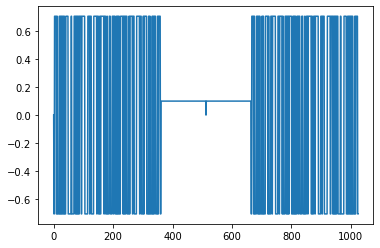

In [9]:
plot_y(known_useful_data_frequencies)

Playing note
done


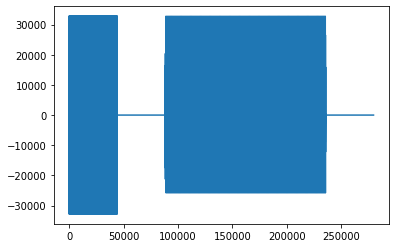

In [10]:
transmit(known_ofdm_symbols, ofdm_symbols)

In [17]:
# record for some seconds
y = record(6)

recording
[0, 1]
done


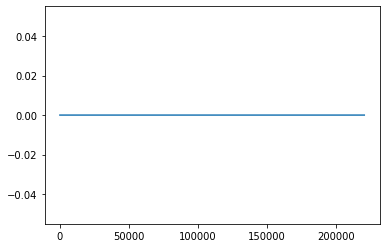

In [18]:
data = np.reshape(y, y.size)

# Chirp for matched filter NB should be same as the transmitted chirp!
h = Chirp(2000, 4000, 1)

h_rev = h[::-1]

g = np.convolve(data, h_rev, 'valid')
plot_y(g) # plot matched filter output

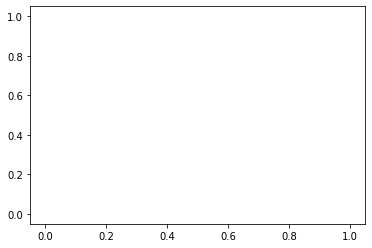

In [19]:
dh = len(h_rev)

i_max = np.argmax(g)

rng = 100
k = g[i_max - rng:i_max + rng]

plot_y(k)

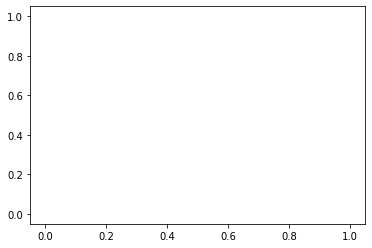

In [20]:
rng2 = 1000
cntr = int(i_max)
plot_y(y[cntr - rng2:cntr  + rng2])

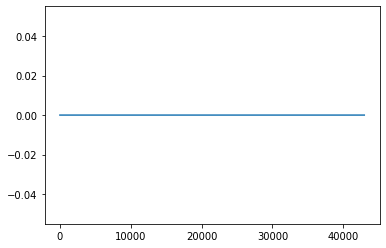

In [15]:
repeat = 20
dft = 2048 # N + K
time_start_index = cntr + dh + 44100 + dft*0
time = y[time_start_index-1000:time_start_index+repeat*dft + 1000]

plot_y(time)

In [16]:
time_data = y[time_start_index:]
dft = 2048

samples = []
freq = []


timeshift = 676
for i in range(repeat):
    samples.append(time_data[dft*i:dft*(i+1)][timeshift:timeshift+1024])
    samples[i] = np.reshape(samples[i],np.zeros(1024).shape)
    freq.append(fft(samples[i]))
    
known = F[5]
Phase = np.zeros(511)
for freq_response in freq:
    
    for i in range(1,int(len(freq_response)/2)):
        div = (freq_response[i]/known[i] )
        Phase[i-1] += cmath.phase(div)        
        
Phase = [x/repeat for x in Phase]

max_conv = []
for s in range(1000):
    P = []
    coeff = -0.01-s*0.001
    n = 0
    sign = coeff/abs(coeff)
    for i in range(1,511):
        val = math.pi * coeff * i - sign *2*math.pi*n

        if sign > 0:
            if val > math.pi:
                val = val - 2*math.pi
                n += 1
        else:
            if val < -1*math.pi:
                val = val + 2*math.pi
                n += 1   
                
        P.append(val)
        
    max_conv.append( max(correlate(P, Phase)))

max_conv = np.asarray(max_conv)
i_max = np.argmax(max_conv)
max_conv_max = np.max(max_conv)

count_up = 0
count_down = 0
cutoff = 0.75
for i in range(100):
    if max_conv[i_max+i] > max_conv_max*cutoff:
        count_up +=1
    
    if max_conv[i_max-i] > max_conv_max*cutoff:
        count_down +=1

print(count_up, count_down)

real_imax = i_max + (count_up - count_down)/2


#plot_y(max_conv[600:700])
print("max ", max_conv_max, "i_max ", i_max, "real i_max ", real_imax)


TF = np.zeros(511,dtype=complex)
TF_without_rotation = np.zeros(511,dtype=complex)
for freq_response in freq:
    
    for i in range(1,int(len(freq_response)/2)):
        div = (freq_response[i]/known[i] ) * cmath.rect(1, math.pi* (0.01+(real_imax-20)*0.001) * i)
        div2 = (freq_response[i]/known[i] )
        TF[i-1] += div 
        TF_without_rotation[i-1] += div2
        
TF = [x/repeat for x in TF]
TF_without_rotation = [x/repeat for x in TF_without_rotation]

impulse = ifft(TF)
plot_y(impulse)

NameError: name 'F' is not defined